In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Import Data

In [8]:
batch_size = 32
img_height = 32 
img_width = 32

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "D:/Dataset/Handwriiten/dhcd/train",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 78200 files belonging to 46 classes.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "D:/Dataset/Handwriiten/dhcd/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 13800 files belonging to 46 classes.


In [12]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '5', '6', '7', '8', '9']


In [14]:
labels_csv = pd.read_csv("D:/Dataset/Handwriiten/labels.csv")
labels_csv.head()

,Class,Label,Devanagari label,Phonetic,Type
0,0,0,०,Śūn'ya,DIGIT
1,1,1,१,ēka,DIGIT
2,2,2,२,du'ī,DIGIT
3,3,3,३,tīna,DIGIT
4,4,4,४,cāra,DIGIT


In [16]:
labels_csv.loc[30, 'Devanagari label']

'प'

ष
थ
९
घ
ब
८
ल
८
म


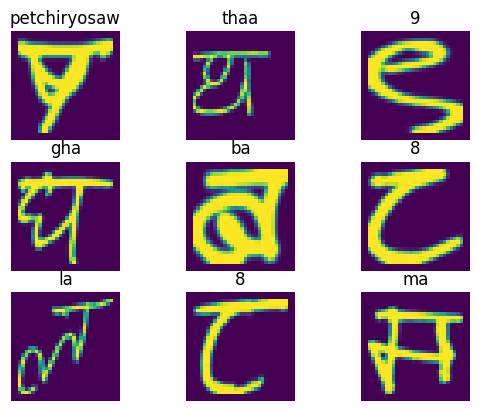

In [17]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
#     print(images[i].numpy().astype("uint8").shape)
#     print(labels[i])    #folder ko index print garxa
#     plt.title(class_names[labels[i]]) #folder ko naam print garxa
    class_name = int(class_names[labels[i]])
    print(labels_csv.loc[class_name, 'Devanagari label'])
    plt.title(labels_csv.loc[class_name, 'Label'])
    plt.axis("off")

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Creating model

In [19]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='linear')
])


d:\Programs\Python9\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125,646 (4.29 MB)

 Trainable params: 1,125,646 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Compiling Model


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training Model

In [25]:
epochs=10
time1 = time.time()

history = model.fit(
  train_ds,
  validation_data=vfal_ds,
  epochs=epochs
)
time2 = time.time()

print("Train time = ", (time2-time1)/60, "min")

Epoch 1/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 230s 75ms/step - accuracy: 0.7050 - loss: 1.0646 - val_accuracy: 0.9685 - val_loss: 0.1068
Epoch 2/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 71s 29ms/step - accuracy: 0.9517 - loss: 0.1563 - val_accuracy: 0.9806 - val_loss: 0.0648
Epoch 3/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 90s 37ms/step - accuracy: 0.9673 - loss: 0.1049 - val_accuracy: 0.9832 - val_loss: 0.0560
Epoch 4/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9747 - loss: 0.0796 - val_accuracy: 0.9843 - val_loss: 0.0515
Epoch 5/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 88s 36ms/step - accuracy: 0.9802 - loss: 0.0629 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 6/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 88s 36ms/step - accuracy: 0.9822 - loss: 0.0554 - val_accuracy: 0.9871 - val_loss: 0.0491
Epoch 7/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9850 - loss: 0.0453 - val_accuracy: 0.9875 - val_loss: 0.0456
Epoch 8/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.9857 

Visualize training results


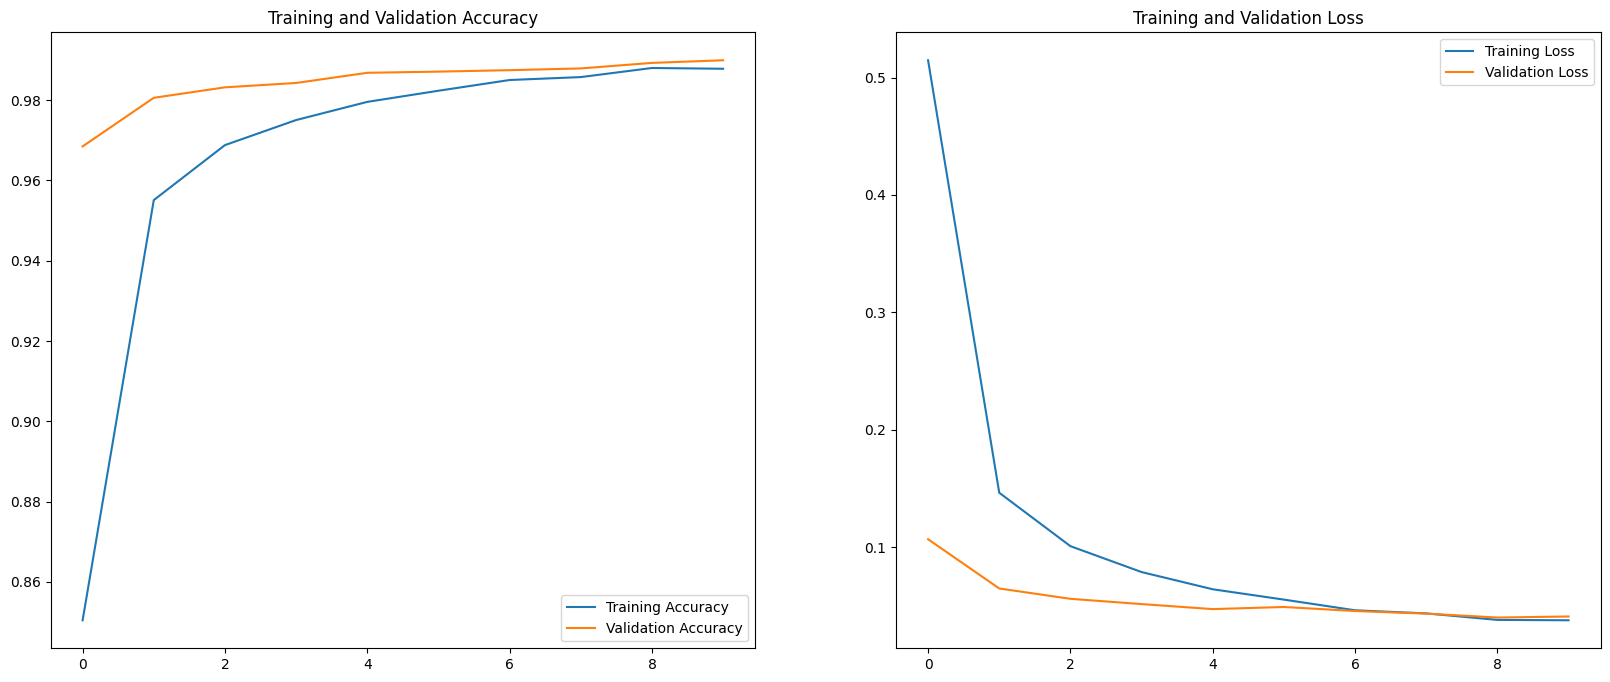

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving Model

In [29]:
model.save('my_model.keras')

In [34]:
new_model1 = tf.keras.models.load_model('my_model.keras')

d:\Programs\Python9\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Actual- ९   Prediction- ९
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Actual- भ   Prediction- भ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Actual- ढ   Prediction- द
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual- ठ   Prediction- ठ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Actual- १   Prediction- १
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual- ध   Prediction- ध
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Actual- फ   Prediction- फ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual- ७   Prediction- ७
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Actual- ण   Prediction- ण


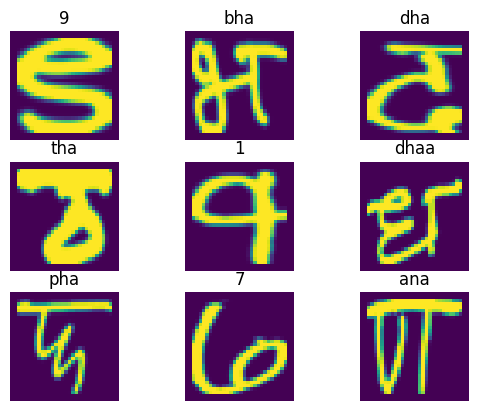

In [35]:
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = images[i].numpy().astype("uint8")
    plt.imshow(img)
#     print(images[i].numpy().astype("uint8").shape)
#     print(labels[i])    #folder ko index print garxa
#     plt.title(class_names[labels[i]]) #folder ko naam print garxa
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    class_name = int(class_names[labels[i]])
    
    predictions = new_model1.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predict = int(class_names[np.argmax(score)])
    print("Actual-" ,labels_csv.loc[class_name, 'Devanagari label']," ", "Prediction-" ,labels_csv.loc[predict, 'Devanagari label'])
    
    
    plt.title(labels_csv.loc[class_name, 'Label'])
    plt.axis("off")